Tenemos diferentes librerías como SQLite, MySQL y PostgreSQL. Exploraremos un poco en esta oportunidad SQLite

Pagina para diagramas ER

https://dbdiagram.io/

Ejemplo de codigo para crear diagrama entidad relacion:

```sql
//// -- LEVEL 1
//// -- Tables and References
// Creating tables
Table users as U{
  id int [pk,increment]
  name varchar [not null]
  age int
  gender varchar
  nationality varchar
}

//// -- LEVEL 2
//// -- Adding column settings

Table posts {
  id int [pk,increment]
  title varchar [not null]
  description varchar [not null]
  user_id int [ref: > users.id,not null] // inline relationship (many-to-one)
}

Table comments {
  id int [pk, increment]
  text_ varchar [not null]
  user_id int [ref: > users.id,not null] // inline relationship (many-to-one)
  post_id int [ref: > posts.id, not null]
}

Table likes {
  id int [pk,increment]
  user_id int [ref: > users.id, not null]
  post_id int [ref: > posts.id, not null]
}

```

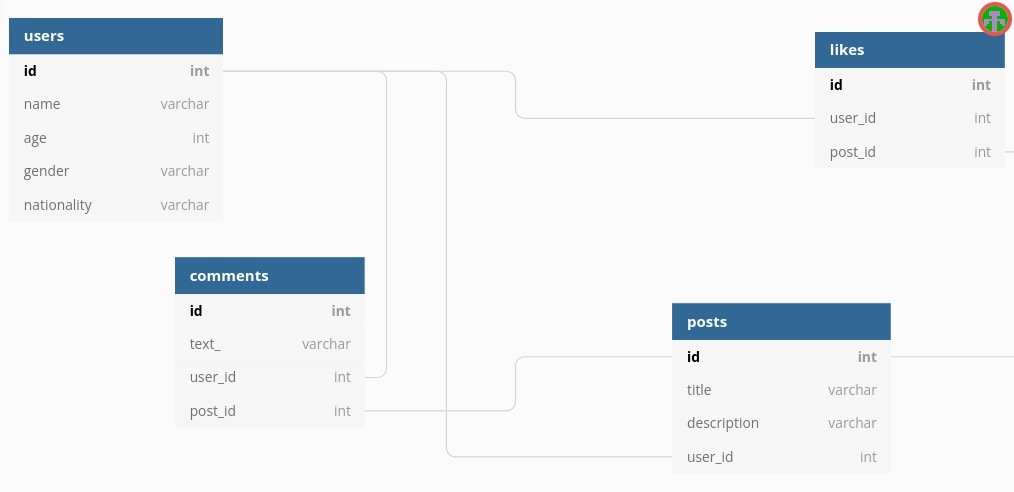

In [1]:
%pwd

'c:\\Users\\Windows\\Desktop\\Bootcamp-DS-2023-I\\Clase 8 - 27 Mar 2023'

# SQL Lite

SQLite es probablemente la base de datos más sencilla para conectarse con una aplicación de Python, ya que no necesita instalar ningún módulo SQL de Python externo para hacerlo. De manera predeterminada, su instalación de Python contiene una biblioteca SQL de Python llamada sqlite3 que puede usar para interactuar con una base de datos SQLite.

Además, las bases de datos SQLite no tienen servidor y son independientes, ya que leen y escriben datos en un archivo. Esto significa que, a diferencia de MySQL y PostgreSQL, ¡ni siquiera necesita instalar y ejecutar un servidor SQLite para realizar operaciones de base de datos!

Miremos como conectarnos a sqlite3 con una base de datos en Python:

In [2]:
import sqlite3
sqlite3.connect?

Docstring:
connect(database[, timeout, detect_types, isolation_level,
        check_same_thread, factory, cached_statements, uri])

Opens a connection to the SQLite database file *database*. You can use
":memory:" to open a database connection to a database that resides in
RAM instead of on disk.
Type:      builtin_function_or_method


In [3]:
import sqlite3
from sqlite3 import Error # Importar librerias
def create_connection(path): # Definir funcion crear conexion
    connection = None
    try:
        connection = sqlite3.connect(path) # uso de connect() que recibe una ruta a la base de datos SQLLite (puede estar en la ram o no)
        print("Conexion a SQLite DB exitosa") # Si la conexion es exitosa se imprime
    except Error as e: # Si existe algun error
        print(f"El error '{e}' ha ocurrido") # mostrar el error
    return connection

```sqlite3.connect(ruta)``` devuelve un objeto de conexión, que a su vez es devuelto por ```create_connection()```. Este objeto de conexión se puede utilizar para ejecutar consultas en una base de datos SQLite. El siguiente script crea una conexión a la base de datos SQLite:

In [7]:
connection = create_connection("C:/Users/Windows/Desktop/Bootcamp-DS-2023-I/Clase 8 - 27 Mar 2023/sm_app.sqlite")

Conexion a SQLite DB exitosa


In [8]:
%ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 7835-A825

 Directorio de c:\Users\Windows\Desktop\Bootcamp-DS-2023-I\Clase 8 - 27 Mar 2023

25-03-2023  09:10    <DIR>          .
25-03-2023  09:08    <DIR>          ..
25-03-2023  05:07           103.462 Clase 8 - Fundamentos de bases de datos.ipynb
25-03-2023  05:05        12.815.687 Clase 8. Bases de datos.pptx
25-03-2023  09:10                 0 sm_app.sqlite
               3 archivos     12.919.149 bytes
               2 dirs  54.081.200.128 bytes libres


In [9]:
# Puede tener cualquier nombre
ruta="C:/Users/Windows/Desktop/Bootcamp-DS-2023-I/Clase 8 - 27 Mar 2023/"
connection = create_connection(ruta+"david.sqlite")

Conexion a SQLite DB exitosa


Ahora se crea un archivo de base de datos sm_app.sqlite en el directorio raíz. Tenga en cuenta que puede cambiar la ubicación para que coincida con su configuración.

# Crear tablas SQL Lite

Para ejecutar consultas en SQLite, debemos usar ```cursor.execute()```. Definiremos una función llamada ```execute_query()``` que usa este método. Su función aceptará el objeto de conexión y una cadena de consulta, que pasará a ```cursor.execute()```.

```.execute()``` puede ejecutar cualquier consulta que se le pase en forma de string. 

In [10]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query ejecutado satisfactoriamente")
    except Error as e:
        print(f"El error '{e}' ha ocurrido")

Creamos el query

In [11]:
crear_tabla_usuarios = """
CREATE TABLE IF NOT EXISTS users (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  age INTEGER,
  gender TEXT,
  nationality TEXT
);
"""

In [12]:
execute_query(connection, crear_tabla_usuarios)  

Query ejecutado satisfactoriamente


In [13]:
crear_tabla_posts = """
CREATE TABLE IF NOT EXISTS posts(
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  title TEXT NOT NULL, 
  description TEXT NOT NULL, 
  user_id INTEGER NOT NULL, 
  FOREIGN KEY (user_id) REFERENCES users (id)
);
"""
# Dado que existe una relación de uno a muchos entre los usuarios y las publicaciones, 
# veran una clave externa user_id en la tabla de publicaciones que hace referencia 
# a la columna de identificación en la tabla de usuarios. 

In [14]:
execute_query(connection, crear_tabla_posts)

Query ejecutado satisfactoriamente


Creamos dos tablas

In [15]:
crear_tabla_comentarios = """
CREATE TABLE IF NOT EXISTS comments (
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  text TEXT NOT NULL, 
  user_id INTEGER NOT NULL, 
  post_id INTEGER NOT NULL, 
  FOREIGN KEY (user_id) REFERENCES users (id) FOREIGN KEY (post_id) REFERENCES posts (id)
);
"""

crear_tabla_likes = """
CREATE TABLE IF NOT EXISTS likes (
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  user_id INTEGER NOT NULL, 
  post_id integer NOT NULL, 
  FOREIGN KEY (user_id) REFERENCES users (id) FOREIGN KEY (post_id) REFERENCES posts (id)
);
"""

execute_query(connection, crear_tabla_comentarios)  
execute_query(connection, crear_tabla_likes)     

Query ejecutado satisfactoriamente
Query ejecutado satisfactoriamente


# Insertar records

In [16]:
crear_usuarios = """
INSERT INTO
  users (name, age, gender, nationality)
VALUES
  ('James', 25, 'hombre', 'USA'),
  ('Leila', 32, 'mujer', 'France'),
  ('Brigitte', 35, 'mujer', 'England'),
  ('Mike', 40, 'hombre', 'Denmark'),
  ('Elizabeth', 21, 'mujer', 'Canada');
"""
execute_query(connection, crear_usuarios)     

Query ejecutado satisfactoriamente


Como configuramos el id para que se incremente automáticamente, no necesita especificar el valor de la columna de identificación para estos usuarios. La tabla de usuarios completará automáticamente estos cinco registros con valores de identificación del 1 al 5.

In [17]:
crear_posts = """
INSERT INTO
  posts (title, description, user_id)
VALUES
  ("Feliz", "Me siento feliz hoy", 1),
  ("Caliente", "El clima esta caliente hoy", 2),
  ("Ayuda", "Necesito ayuda en esto", 2),
  ("Buenas noticias", "Me casare pronto", 1),
  ("Juego interesante", "Fue genial jugar al tenis", 5),
  ("Fiesta", "Alguno quiere venir a esta fiesta hoy?", 3);
"""
execute_query(connection, crear_posts)  

Query ejecutado satisfactoriamente


Es importante mencionar que la columna ```user_id``` de la tabla de publicaciones es una **llave foranea** que hace referencia a la columna **id** de la tabla de usuarios. Esto significa que la columna ```user_id``` debe contener un valor que ya existe en la columna ```id`` de la tabla de usuarios. Si no existe, habrá un error.

In [18]:
crear_comentarios = """
INSERT INTO
  comments (text, user_id, post_id)
VALUES
  ('Cuenta conmigo', 1, 6),
  ('Que tipo de ayuda?', 5, 3),
  ('Felicitaciones', 2, 4),
  ('Estuve jugando con Rafael', 4, 5),
  ('Te ayudo con tu tesis?', 2, 3),
  ('Muchas felicitaciones', 5, 4);
"""

crear_likes = """
INSERT INTO
  likes (user_id, post_id)
VALUES
  (1, 6),
  (2, 3),
  (1, 5),
  (5, 4),
  (2, 4),
  (4, 2),
  (3, 6);
"""

execute_query(connection, crear_comentarios)
execute_query(connection, crear_likes)  

Query ejecutado satisfactoriamente
Query ejecutado satisfactoriamente


# Seleccionando records

In [19]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"Error '{e}' ha ocurrido")

In [20]:
elegir_usuarios = "SELECT * from users"
users = execute_read_query(connection, elegir_usuarios)

for user in users:
    print(user)

(1, 'James', 25, 'hombre', 'USA')
(2, 'Leila', 32, 'mujer', 'France')
(3, 'Brigitte', 35, 'mujer', 'England')
(4, 'Mike', 40, 'hombre', 'Denmark')
(5, 'Elizabeth', 21, 'mujer', 'Canada')


In [21]:
elegir_posts = "SELECT * FROM posts"
posts = execute_read_query(connection, elegir_posts)

for post in posts:
    print(post)

(1, 'Feliz', 'Me siento feliz hoy', 1)
(2, 'Caliente', 'El clima esta caliente hoy', 2)
(3, 'Ayuda', 'Necesito ayuda en esto', 2)
(4, 'Buenas noticias', 'Me casare pronto', 1)
(5, 'Juego interesante', 'Fue genial jugar al tenis', 5)
(6, 'Fiesta', 'Alguno quiere venir a esta fiesta hoy?', 3)


In [22]:
joins_usuarios_posts = """
SELECT
  users.id,
  users.name,
  posts.description
FROM
  posts
  INNER JOIN users ON users.id = posts.user_id
"""

usuarios_posts = execute_read_query(connection, joins_usuarios_posts)

for x in usuarios_posts:
    print(x)

(1, 'James', 'Me siento feliz hoy')
(2, 'Leila', 'El clima esta caliente hoy')
(2, 'Leila', 'Necesito ayuda en esto')
(1, 'James', 'Me casare pronto')
(5, 'Elizabeth', 'Fue genial jugar al tenis')
(3, 'Brigitte', 'Alguno quiere venir a esta fiesta hoy?')


El siguiente script devuelve todas las publicaciones, junto con los comentarios sobre las publicaciones y los nombres de los usuarios que publicaron los comentarios:

In [23]:
elegir_publicaciones_comentarios_usuarios = """
SELECT
  posts.description as post,
  text as comment,
  name
FROM
  posts
  INNER JOIN comments ON posts.id = comments.post_id
  INNER JOIN users ON users.id = comments.user_id
"""

p_c_u = execute_read_query(
    connection, elegir_publicaciones_comentarios_usuarios
)

for y in p_c_u:
    print(y)

('Alguno quiere venir a esta fiesta hoy?', 'Cuenta conmigo', 'James')
('Necesito ayuda en esto', 'Que tipo de ayuda?', 'Elizabeth')
('Me casare pronto', 'Felicitaciones', 'Leila')
('Fue genial jugar al tenis', 'Estuve jugando con Rafael', 'Mike')
('Necesito ayuda en esto', 'Te ayudo con tu tesis?', 'Leila')
('Me casare pronto', 'Muchas felicitaciones', 'Elizabeth')


Pueden ver en la salida que ```.fetchall()``` no devuelve los nombres de las columnas. Para devolver los nombres de las columnas, podemos usar el atributo ```.description```. Por ejemplo, la siguiente lista devuelve todos los nombres de columna para la consulta anterior:


In [24]:
cursor = connection.cursor()
cursor.execute(elegir_publicaciones_comentarios_usuarios)
cursor.fetchall()

columnas = [description[0] for description in cursor.description]
print(columnas)

['post', 'comment', 'name']


In [25]:
# Cerrar conexiones importante
cursor.close()